Found 26500 validated image filenames belonging to 2 classes.
Found 6626 validated image filenames belonging to 2 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-29 14:42:30.667548: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-01-29 14:42:30.667589: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-01-29 14:42:30.667598: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-01-29 14:42:30.667910: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-29 14:42:30.667931: I tensorflow/core/common_runtime/pluggable_device/plu

Epoch 1/20


2025-01-29 14:42:39.576670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


829/829 ━━━━━━━━━━━━━━━━━━━━ 5706s 7s/step - accuracy: 0.9662 - loss: 0.4369 - val_accuracy: 0.9813 - val_loss: 0.0993
Epoch 2/20
829/829 ━━━━━━━━━━━━━━━━━━━━ 8180s 10s/step - accuracy: 0.9792 - loss: 0.1800 - val_accuracy: 0.9820 - val_loss: 0.1402
Epoch 3/20
829/829 ━━━━━━━━━━━━━━━━━━━━ 3680s 4s/step - accuracy: 0.9799 - loss: 0.1371 - val_accuracy: 0.9820 - val_loss: 0.0903
Epoch 4/20
829/829 ━━━━━━━━━━━━━━━━━━━━ 3766s 5s/step - accuracy: 0.9775 - loss: 0.2151 - val_accuracy: 0.9820 - val_loss: 0.1016
Epoch 5/20
829/829 ━━━━━━━━━━━━━━━━━━━━ 3991s 5s/step - accuracy: 0.9829 - loss: 0.0978 - val_accuracy: 0.9820 - val_loss: 0.1028
Epoch 6/20
829/829 ━━━━━━━━━━━━━━━━━━━━ 3700s 4s/step - accuracy: 0.9825 - loss: 0.0879 - val_accuracy: 0.9816 - val_loss: 0.1174
Epoch 7/20
829/829 ━━━━━━━━━━━━━━━━━━━━ 4311s 5s/step - accuracy: 0.9808 - loss: 0.0975 - val_accuracy: 0.9820 - val_loss: 0.1235
Epoch 8/20
829/829 ━━━━━━━━━━━━━━━━━━━━ 3785s 5s/step - accuracy: 0.9810 - loss: 0.0939 - val_accura

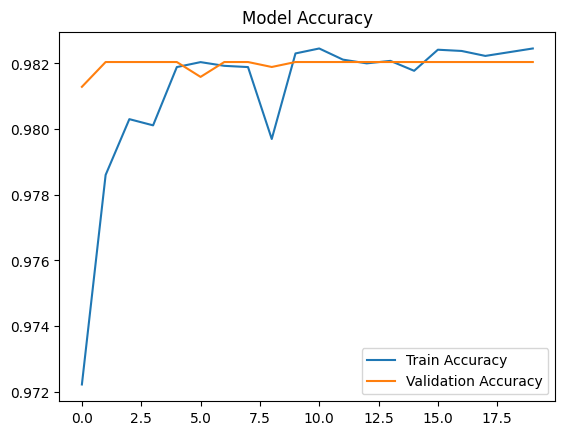

Model saved successfully!


In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 🔹 Step 1: Load Metadata
metadata_path = "/Users/samrudhsalas/Downloads/SkinGuard/Skin_Cancer/ISIC_2020_Training_GroundTruth.csv"  # Adjust path as needed
df = pd.read_csv(metadata_path)

# 🔹 Step 2: Define Data Directories
IMAGE_DIR = "/Users/samrudhsalas/Downloads/SkinGuard/Skin_Cancer/train"  # Folder where ISIC 2020 images are stored
df['image_path'] = df['image_name'].apply(lambda x: os.path.join(IMAGE_DIR, x + ".jpg"))

# 🔹 Step 3: Define Train-Test Split
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Convert Labels to Binary (0 = Benign, 1 = Malignant)
train_df['target'] = train_df['target'].astype(str)
val_df['target'] = val_df['target'].astype(str)

# 🔹 Step 4: Data Augmentation & Preprocessing
IMG_SIZE = (224, 224)  # Image dimensions

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_path",
    y_col="target",
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode="binary"
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="image_path",
    y_col="target",
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode="binary"
)

# 🔹 Step 5: Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    
    Dense(1, activation='sigmoid')  # Binary classification (malignant/benign)
])

# 🔹 Step 6: Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 🔹 Step 7: Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

# 🔹 Step 8: Plot Training Performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

# 🔹 Step 9: Save Model
model.save("isic2020_cnn_model.h5")
print("Model saved successfully!")


In [24]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Load the trained model
model = load_model("isic2020_cnn_model.h5")

# Fix retracing by using tf.function and ensuring input shape consistency @tf.function(reduce_retracing=True)
def predict_image(img_path):
    """Predicts if the given image is malignant or benign."""
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array.astype('float32') / 255.0  # Normalize

    prediction = model.predict(img_array, verbose=0)  # Ensure verbose=0 to suppress logs
    class_label = "Malignant" if prediction[0][0] > 0.5 else "Benign"
    print(f"Prediction: {class_label} (Confidence: {prediction[0][0]:.2f})")

# Test an image
test_img = "/Users/samrudhsalas/Downloads/SkinGuard/Skin_Cancer/train/ISIC_0250839.jpg"  # Adjust path
predict_image(test_img)


Prediction: Benign (Confidence: 0.03)
